**Imports**

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Feature Selection
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LassoLars

import matplotlib.mlab as mlab

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

**Loading Data**

In [2]:

# Load training data
X = np.genfromtxt('training.csv', 
                  delimiter=',', 
                  dtype=None,
                  skip_header = 1,
                  usecols=range(1, 3594)) # Load columns 0 to 3594 inclusive

Ca = np.genfromtxt('training.csv', 
                   delimiter=',', 
                   dtype=None,
                   skip_header = 1,
                   usecols=3595) # Load Mehlich-3 extractable Calcium data

P = np.genfromtxt('training.csv', 
                   delimiter=',', 
                   dtype=None,
                   skip_header = 1,
                   usecols=3596) # Load Mehlich-3 extractable Phosphorus data

pH = np.genfromtxt('training.csv', 
                   delimiter=',', 
                   dtype=None,
                   skip_header = 1,
                   usecols=3597) # Load pH data

SOC = np.genfromtxt('training.csv', 
                    delimiter=',', 
                    dtype=None,
                    skip_header = 1,
                    usecols=3598) # Load Soil Organic Carbon data

Sand = np.genfromtxt('training.csv', 
                     delimiter=',', 
                     dtype=None,
                     skip_header = 1,
                     usecols=3599) # Load Sand Content data

# Each record in the training data loads as a tuple.
# Convert it to a 2D array
# TODO:  There's a better way to do this somewhere.
new_X = []
for i in range(X.shape[0]):
    new_X.append(list(X[i]))
X = np.array(new_X)

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
#shuffle = np.random.permutation(np.arange(X.shape[0]))
#X, Ca, P, pH, SOC, Sand = X[shuffle], Ca[shuffle], P[shuffle], pH[shuffle], SOC[shuffle], Sand[shuffle] 

# Define the size of the dev data set
devSetSize = 200

dev_data = X[0:devSetSize]
dev_Ca_labels = Ca[0:devSetSize]
dev_P_labels = P[0:devSetSize]
dev_pH_labels = pH[0:devSetSize]
dev_SOC_labels = SOC[0:devSetSize]
dev_Sand_labels = Sand[0:devSetSize]

dev_labels = [dev_Ca_labels, dev_P_labels, dev_pH_labels, dev_SOC_labels, dev_Sand_labels]

outcome_vars = ['Ca', 'P', 'pH', 'Soc', 'Sand']

train_data = X[devSetSize:]
train_Ca_labels = Ca[devSetSize:]
train_P_labels = P[devSetSize:]
train_pH_labels = pH[devSetSize:]
train_SOC_labels = SOC[devSetSize:]
train_Sand_labels = Sand[devSetSize:]
train_labels = [train_Ca_labels, train_P_labels, train_pH_labels, train_SOC_labels, train_Sand_labels]
print(dev_Ca_labels.shape)
print(train_Ca_labels.shape)


print('Number of features:', dev_data.shape[1])
print('Number of training examples:', train_data.shape[0])
print('Number of dev examples:', dev_data.shape[0])

#TODO: Dev / Train data have 2 string columns, the first and the last. 
#The first is an ID, and the last is a categorical with 2 possible values apparently. 
#Encode / transform these so they are useful

# Load test data
test_x = np.genfromtxt('sorted_test.csv', 
                                delimiter=',', 
                                dtype=None,
                                skip_header = 1,
                                usecols=range(1, 3594)) # Load columns 0 to 3594 inclusive

test_ids = np.genfromtxt('sorted_test.csv', 
                                delimiter=',', 
                                dtype=None,
                                skip_header = 1,
                                usecols=0) # Load columns 0 to 3594 inclusive

new_test_x = []
for i in range(test_x.shape[0]):
    new_test_x.append(list(test_x[i]))
test_x = np.array(new_test_x)


print('Number of test examples:', test_x.shape[0])




(200L,)
(957L,)
('Number of features:', 3593L)
('Number of training examples:', 957L)
('Number of dev examples:', 200L)
('Number of test examples:', 727L)


In [3]:
# K Nearest Neighbors
n_neighbors = 5
knn = KNeighborsRegressor(n_neighbors)

for i in range(3593):

    # In order to pull just one feature (column) and use it, we have to use the reshape function. 
    train_data_i = train_data[:,i].reshape(-1,1)
    dev_data_i = dev_data[:,i].reshape(-1,1)

    knn.fit(train_data_i, train_Ca_labels)
    rs = knn.score(dev_data_i,dev_Ca_labels)
    if rs > 0:
        print('column %5i :, R-squared: %3.3f' %(i,rs))



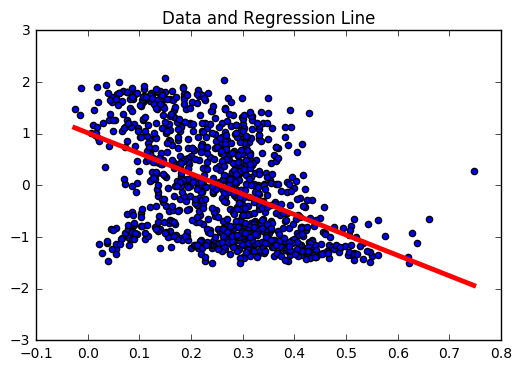

In [4]:
# Linear Regression
lm = LinearRegression()
        
def PlotUnivariateFitAndResids(X, Y, preds, preds_sorted):
    plt.subplot(1, 1, 1)
    plt.scatter(np.ravel(X), Y)
    plt.plot(np.sort(X, 0), preds_sorted, 'r', linewidth=3.5)
    plt.title("Data and Regression Line")

    #plt.subplot(1, 2, 2)
    #resid = np.ravel(Y) - preds
    #plt.scatter(X, resid)
    #plt.title("Residual Plot")

    plt.show()

## fit linear regression model
def LinearRegressionFitAndPlot(X, Y):
    lm = LinearRegression()
    lm.fit(X, Y)
    preds = lm.predict(X)
    preds_sorted = lm.predict(np.sort(X, 0))#

    PlotUnivariateFitAndResids(X, Y, preds, preds_sorted)

    
my_col = 200

train_data_i = train_data[:,my_col].reshape(-1,1)
dev_data_i = dev_data[:,my_col].reshape(-1,1)

        
LinearRegressionFitAndPlot(train_data_i, train_Sand_labels)

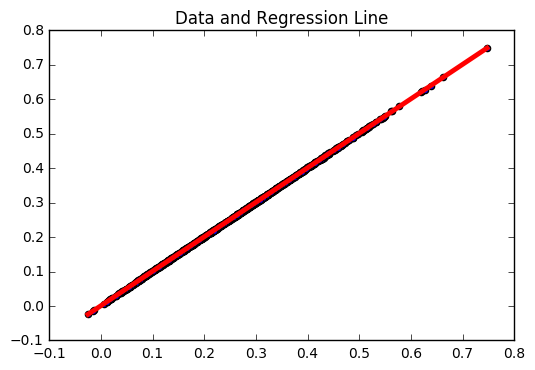

In [5]:
# Show that each column is almost perfectly colinear
my_col = 200
my_colp1 = my_col + 1

train_data_i = train_data[:,my_col].reshape(-1,1)
train_data_ip1 = train_data[:,my_colp1].reshape(-1,1)

        
LinearRegressionFitAndPlot(train_data_i, train_data_ip1)


#from statsmodels.regression.quantile_regression import QuantReg 
#from mpl_toolkits.mplot3d import Axes3D

#train_data_i   = train_data[:,0].reshape(-1,1)
#train_data_ip1 = train_data[:,3500].reshape(-1,1)
#dev_data_i = dev_data[:,].reshape(-1,1)

#plt.subplot(1,1,1)
#plt.scatter(train_data_i,train_data_ip1)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(train_data_i,train_data_ip1,train_Ca_labels)


#plt.subplot(1, 2, 1) 

#plt.scatter(np.ravel(X), Y)
#plt.plot(np.sort(X, 0), preds_sorted, 'r', linewidth=3.5)
#plt.title("Data and Regression Line")

#plt.subplot(1, 2, 2)
#resid = np.ravel(Y) - preds
#plt.scatter(X, resid)
#plt.title("Residual Plot")

#plt.show()

Experiment on PCA: Analyze the explaned variances for PCA over our features. We observe that the first 20 components explain increasing portions of the variance, however after 20 components, the subsequent ones don't really help.

In [66]:
    # Fit PCA for the train data
    pca = PCA()
    pca.fit(train_data)
    
    accum = 0.0
    # Display the fraction of the variance explained by the top 50 components
    for i in range(1, 200):
        accum = accum + pca.explained_variance_ratio_[i]
        print 'k: ' + str(i) + ', Variance fraction explained: ' + str(pca.explained_variance_ratio_[i]) + ', accum variance explained: ' + str(accum)
        
    

k: 1, Variance fraction explained: 0.0897691274188, accum variance explained: 0.0897691274188
k: 2, Variance fraction explained: 0.061464776776, accum variance explained: 0.151233904195
k: 3, Variance fraction explained: 0.0327262962019, accum variance explained: 0.183960200397
k: 4, Variance fraction explained: 0.0249842128516, accum variance explained: 0.208944413248
k: 5, Variance fraction explained: 0.0173442048786, accum variance explained: 0.226288618127
k: 6, Variance fraction explained: 0.0137040548135, accum variance explained: 0.23999267294
k: 7, Variance fraction explained: 0.0107054629474, accum variance explained: 0.250698135888
k: 8, Variance fraction explained: 0.00601893562237, accum variance explained: 0.25671707151
k: 9, Variance fraction explained: 0.00511167477089, accum variance explained: 0.261828746281
k: 10, Variance fraction explained: 0.00426470744967, accum variance explained: 0.266093453731
k: 11, Variance fraction explained: 0.00359511093507, accum variance

**Feature selectors**

In [67]:

def getFeatureSelectors():
     return [
        #['lasso', SelectFromModel(LassoCV()) ], # Doesn't work
        #['linearc0.01', SelectFromModel(LinearSVC(C=0.01, penalty="l1")) ],
        #['linearc0.1', SelectFromModel(LinearSVC(C=0.1, penalty="l1")) ],
        #['linearc11', SelectFromModel(LinearSVC(C=1, penalty="l1")) ],
        #['kbest100', SelectKBest(k=100)],
        #['kbest250', SelectKBest(k=250)],
        #['pca5', PCA(n_components=5)],
        #['pca10', PCA(n_components=10)],
        ['pca20', PCA(n_components=20)],
        ['pca20kbest5', FeatureUnion([("pca5", PCA(n_components=20)), ("kbest5", SelectKBest(k=5))])],
        ['pca20kbest50', FeatureUnion([("pca5", PCA(n_components=20)), ("kbest5", SelectKBest(k=50))])],
        ['pca20kbest250', FeatureUnion([("pca5", PCA(n_components=20)), ("kbest5", SelectKBest(k=250))])],
     ]


**Classifiers**

In [61]:

def getClassifiers():
     return [
        ['KNN', KNeighborsRegressor(), {'n_neighbors':[1, 2, 3, 5, 8]}],
        #['SVR', SVR(cache_size=7000, kernel='linear', C=100, epsilon=0.05, shrinking=False), {}],
        ['Lasso', Lasso(), {'alpha':[0.01, 0.05, 0.25, 0.9]}],
        ['LassoLars', LassoLars(), {'alpha':[0.01, 0.1, 0.5, 1.0]}],            
        ['RandomForest', RandomForestRegressor(), {'n_estimators':[1, 2, 3, 5, 8]}]
        #['RandomForest', RandomForestRegressor(), {'n_estimators':[1, 2, 3, 5, 8]}]
    ]


**Test combinations of selectors and classifiers**

In [62]:


# For each outcome variable, for each classifier and for each selector, it will obtain and print 
# the best hyperparameters and inmediately print the mean squared error.
# Finally, after finishing the calculations, it will print the methods and score ordered by score (MSE)
# To see what would be the final score we'd get, you can get the best MSE score for each outcome variable,
# and calculate the average of them.
def run():
    
    allResults = []
    
    scaler = Normalizer().fit(train_data)

    
    transformedTrainData = scaler.transform(train_data)
    transformedDevData = scaler.transform(dev_data)

    
    for outcomeVarIndex in range(0, 5):
        print '*************************************************************'
        print 'Outcome Variable:', outcome_vars[outcomeVarIndex]
        print '*************************************************************'

        results = []
            
        scaler = Normalizer().fit(train_data)

        for selector in getFeatureSelectors():
            
            selectedTrainData = selector[1].fit(transformedTrainData, train_labels[outcomeVarIndex]).transform(transformedTrainData)
            selectedDevData = selector[1].transform(transformedDevData)
                
            for classifier in getClassifiers():

                print '-------------------------------------------------------'
                print selector[0] + ' ' + classifier[0]

                grid_search = GridSearchCV(classifier[1], param_grid=classifier[2])

                grid_search.fit(selectedTrainData, train_labels[outcomeVarIndex])
                print(grid_search.best_estimator_)

                meanSquaredError = 0.0
                for i in range(len(selectedDevData)):
                    diff = grid_search.predict(selectedDevData[i].reshape(1, -1)) - dev_labels[outcomeVarIndex][i]
                    squaredDiff = diff ** 2
                    meanSquaredError = meanSquaredError + squaredDiff
                    
                meanSquaredError = meanSquaredError / float(len(selectedDevData))
                
                print 'Mean Squared Error: ', str(meanSquaredError)
                print 'Score: ' + str(grid_search.score(selectedDevData, dev_labels[outcomeVarIndex]))
                
                # Store in an array, for each combination, the following:
                # [selector name, classifier name, mean squared error, selector instance, classifier instance]
                results.append([selector[0], classifier[0], meanSquaredError, selector[1], grid_search])

                                                            
        sortedResults = sorted(results, key=lambda result: result[2], reverse=False)
        for result in sortedResults:
            print 'Selector: ' + str(result[0]) + ', Classifier: ' + str(result[1])  + ', MeanSquaredError: ' + str(result[2])
        
        copyResults = sortedResults[:]
        allResults.append(copyResults)
        
    #TODO Calculate columnwise mean of the mean squared error
    #Each item has the best result on item 0
    squaredErrorSum = 0.0
    
    bestModels = []
    print '-------------------------------------------------------'
    print 'Best Results'
    print '-------------------------------------------------------'
    for i in range(len(allResults)):

        columnResults = allResults[i]
        bestColumnResult = columnResults[0]
        squaredError = bestColumnResult[2]
        print 'Outcome Variable: ' + outcome_vars[i] + ', Selector: ' + str(bestColumnResult[0]) + ', Classifier: ' + str(bestColumnResult[1])  + ', MeanSquaredError: ' + str(bestColumnResult[2])
        squaredErrorSum = squaredErrorSum + squaredError
        bestModels.append(bestColumnResult)
        
        
    print 'Best result obtained: ' + str(squaredErrorSum / 5.0)
    
    return bestModels

models = run()


*************************************************************
Outcome Variable: Ca
*************************************************************
-------------------------------------------------------
pca20 KNN
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
Mean Squared Error:  [ 0.05860548]
Score: -0.368799469447
-------------------------------------------------------
pca20 Lasso
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Mean Squared Error:  [ 0.1419717]
Score: -2.31591488542
-------------------------------------------------------
pca20 LassoLars
LassoLars(alpha=0.01, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=F

**Predictions based on our dev data**


In [64]:

allPredictions = []

# Iterate through test samples
for sampleIndex in range(len(test_x)):
    
    sampleId = test_ids[sampleIndex]
    sample = test_x[sampleIndex]
    
    currentSamplePredictions = []
    
    # Use the appropriate model to estimate the 5 outcome variables
    for outcomeVarIndex in range(0, 5):
        
        # Grab selector and classifier
        selector = models[outcomeVarIndex][3]
        classifier = models[outcomeVarIndex][4]
        
        # Transform the input variables
        selectedSample = selector.transform(sample.reshape(1, -1))
        
        # Predict
        predicted = classifier.predict(selectedSample.reshape(1, -1))
        
        # Store
        currentSamplePredictions.append(predicted[0])
    
    allPredictions.append(currentSamplePredictions)
    

print allPredictions
       

[[5.7378866807752429, 0.010909225105551966, 0.16366485674781536, 1.8319990399484223, 201.04422062290027], [5.7378866807752429, 0.010909225105551966, 0.16366485674781536, 1.8319990399484223, 172.7707959560266], [5.7378866807752429, 0.010909225105551966, 0.16366485674781536, 1.8319990399484223, 153.38403675985668], [5.7378866807752429, 0.010909225105551966, 0.16366485674781536, 1.8319990399484223, 156.86869591826698], [7.4957025307208065, 0.010909225105551966, -0.23616926201358326, 1.4901501417299721, 205.18827810932882], [6.6511974233061455, 0.010909225105551966, 0.28759005145164129, 1.8945085527655106, 181.34393497547734], [6.8148774601801527, 0.010909225105551966, -0.14264081318050825, 1.4061529838820097, 169.03345817653502], [7.0463869092864622, 0.010909225105551966, 0.060783563031431509, 1.6669348576657992, 174.14947968702157], [5.7378866807752429, 0.010909225105551966, -0.051450575568259771, 1.5712171661646328, 170.81405783840077], [6.6511974233061455, 0.010909225105551966, 0.28759

**Generate CSV file for kaggle submission**

In [65]:
# Print header
header = 'PIDN,Ca,P,pH,SOC,Sand'
#np.savetxt('test.out', header, delimiter=',')  

filename = 'test.txt'
# Clean file
open(filename, 'w').close()
with open(filename, 'w') as f:
    f.write('PIDN,Ca,P,pH,SOC,Sand\n')  # python will convert \n to os.linesep

    # Iterate through test samples
    for i in range(len(allPredictions)):

        pred = allPredictions[i]
        testId = test_ids[i]
        text = testId + ',' + str(pred[0]) + ',' + str(pred[1]) + ',' + str(pred[2]) + ',' + str(pred[3]) + ',' + str(pred[4]) + '\n'
        f.write(text) 
    
f.close()

Investigation: Sand variable

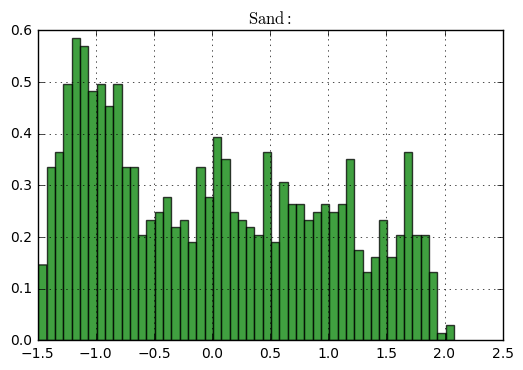

0.19214746061
[ 0.77085976]


In [68]:


#!/usr/bin/env python



# the histogram of the data
n, bins, patches = plt.hist(train_Sand_labels, 50, normed=1, facecolor='green', alpha=0.75)

plt.title(r'$\mathrm{Sand:}$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

scaler = Normalizer().fit(train_data)

transformedTrainData = scaler.transform(train_data)
transformedDevData = scaler.transform(dev_data)

selector = FeatureUnion([("pca5", PCA(n_components=20)), ("kbest5", SelectKBest(k=250))]).fit(transformedTrainData, train_Sand_labels)
#selector = SelectFromModel(LassoCV(), threshold=0.25).fit(transformedTrainData, train_Sand_labels)
selectedTrainData = selector.transform(transformedTrainData)
selectedDevData = selector.transform(transformedDevData)


classifier =  LassoLars(alpha=0.01)#LassoLars is doing very well on dev set, but horribly wrong in test set. bug or really overfitted?
classifier.fit(transformedTrainData, train_Sand_labels)

print classifier.score(transformedDevData, dev_Sand_labels)

meanSquaredError = 0.0
for i in range(len(transformedDevData)):
    diff = classifier.predict(transformedDevData[i].reshape(1, -1)) - dev_Sand_labels[i]
    #print str(classifier.predict(transformedDevData[i].reshape(1, -1))) + ', ' + str(dev_Sand_labels[i])
    squaredDiff = diff ** 2
    meanSquaredError = meanSquaredError + squaredDiff
    

    
print meanSquaredError / float(len(transformedDevData))